In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df  = pd.read_csv("titanic_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

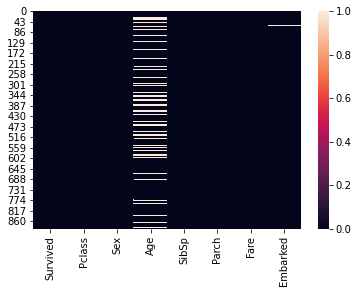

In [10]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

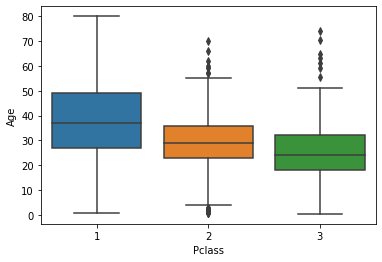

In [11]:
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [12]:
agemean = int(df["Age"].mean())

In [13]:
df["Age"] = df["Age"].replace(to_replace= np.nan, value= agemean)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

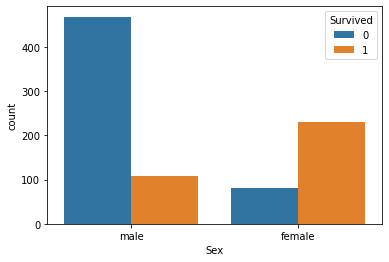

In [17]:
sns.countplot(x = df["Sex"], data= df,  hue= df["Survived"])

In [18]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


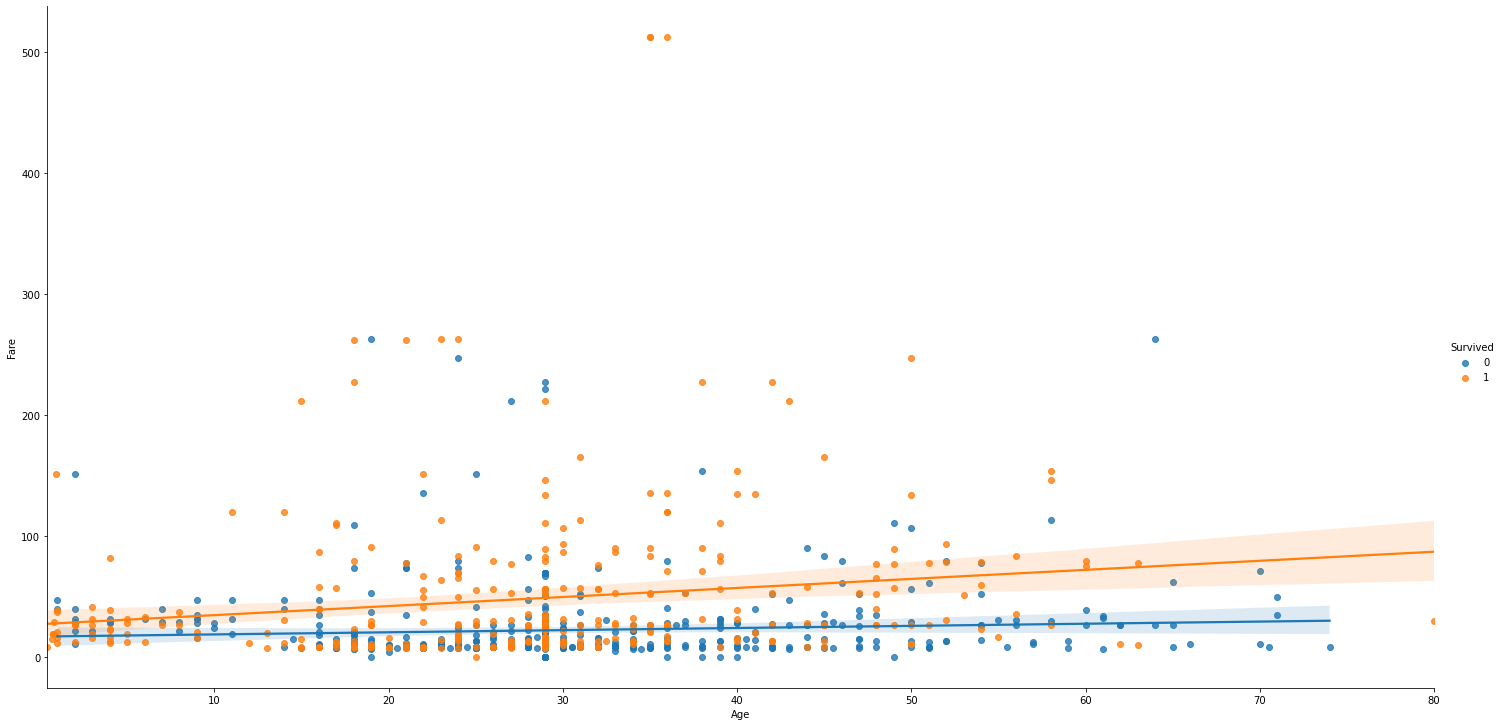

In [19]:
sns.lmplot(x = "Age", y = "Fare", data=df, hue="Survived", aspect= 2, height=10)

In [23]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

In [27]:
embarked = pd.get_dummies(df["Embarked"], drop_first= True)

In [29]:
df = pd.concat([df, embarked], axis=1)

In [31]:
df.drop("Embarked", axis=1, inplace=True)

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,29.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression(max_iter=2000)

In [65]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [66]:
model.intercept_

array([5.33606161])

In [67]:
model.coef_

array([[-1.02499178e+00, -2.59630334e+00, -4.39938911e-02,
        -3.92961214e-01, -3.47861954e-02,  2.39408310e-03,
        -2.58548210e-01, -5.48021152e-01]])

### Predictions

In [68]:
predictions = model.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [70]:
print(explained_variance_score(y_test, predictions))

0.1056287425149699


In [71]:
print(confusion_matrix(y_test, predictions))

[[137  30]
 [ 26  74]]


In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       167
           1       0.71      0.74      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



### Unbalanced
-> this is why 1 has a lower score than 0 

<AxesSubplot:xlabel='Survived', ylabel='count'>

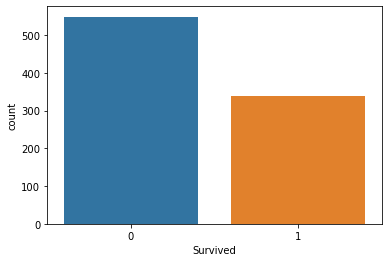

In [73]:
sns.countplot(x = df["Survived"])

In [90]:
from random import randint
randomIndex = randint(0, len(df))
randomPassanger = df.drop("Survived", axis=1).iloc[randomIndex]

In [91]:
randomPassanger

Pclass     3.0000
Sex        1.0000
Age       16.0000
SibSp      0.0000
Parch      0.0000
Fare       9.2167
Q          0.0000
S          1.0000
Name: 138, dtype: float64

In [92]:
X_train.shape

(622, 8)

In [93]:
randomPassanger = randomPassanger.values.reshape(1,8)

In [94]:
randomPassanger

array([[ 3.    ,  1.    , 16.    ,  0.    ,  0.    ,  9.2167,  0.    ,
         1.    ]])

 ## Random passanger prediction

In [95]:
model.predict(randomPassanger)

array([0])

### True value

In [96]:
df.iloc[randomIndex]["Survived"]

0.0